## Assignment for BIO724P 2023-2024

__________________________________

### Instructions

Perform the following tasks divided into four problems. Each problem is equally weighted for the final grade. Return this jupyter notebook with your solutions but with a cleaned output. If you can't return a cleaned jupyter notebook, submit a text file where you clearly indicate which lines refer to your solutions and comments. If you use libraries, make sure to indicate where to load them. You must use __R__ to solve these problems. Other programming languages are not allowed. Make your code reproducible, interpretable, and efficient. We should be able to run your code as seamlessly as possible. You need to submit only one file with the solutions.

___________________________________

### Problems

In the analysis of next-generation sequencing (NGS) data, one of the main challenges is to perform genotype calling. This operation consists of assigning genotypes to each sequenced individual at each genomic site. For instance, in humans and other diploid species with low mutation rates, at each site individuals are assigned either of three possible genotypes: homozygote for the reference allele, heterozygote, or homozygote for the alternate allele. The information on called genotypes is typically present in VCF files. 

Assuming that the reference allele is coded as "0" and the alternate allele is coded as "1", the sample space _S_ of all possible genotypes over two independent (unlinked) genomic sites is S=\{00-00, 00-01, 00-11, 01-00, 01-01, 01-11, 11-00, 11-01, 11-11\}. In the following table, _S_ is represented with the genotype for the first site  on rows, and the genotype for the second site  on columns.

| S  | 00  | 01  | 11  |
|---|---|---|---|
| __00__  | 00-00  | 00-01  | 00-11  |
| __01__  | 01-00  | 01-01  | 01-11  |
| __11__  | 11-00  | 11-01  | 11-11  |

In other words, assume that your experiment consists of drawing two genotypes for the same individual over two sites. _S_ represents the possible outcomes of this experiment (e.g., the outcome 00-01 represents homozygote for allele "0" in one site \{00\} and heterozygote \{01\} in the second site). Note that, as expected, we obtain $3^2=9$ possible outcomes. Finally, note that genotypes \{01\} and \{10\} are equivalent.


__Problem 1__

__Task 1.1__ 

Construct a random variable _G_ representing the number of alternate alleles over two sites. In this case, we are not interested in the genotypes per se as previously defined, but rather at the count of alternate alleles "1" over two sites. For instance, a homozygote for the reference allele will not contribute to the count of the alternate alleles, while a heterozygote will contribute by adding one to the count. Note that we are interested in this metric over two sites. Assuming that each genotype has equal probability to occur, use this information to define the sample space of _G_ and calculate its probability mass function.

In [4]:
# A sample space of Genotypes is created
genotype <- c("00", "01", "11")
samplespace <- expand.grid(site1 = genotype, site2 = genotype)

# The number of '1's is counted in a Genotype via a alternative function
alternate_alleles_fcount <- function(genotype) {length(grep("1", unlist(strsplit(genotype, ""))))}

# Each genotype combination has the number of 1 counted and calculated by applying the alternative function
number_of_alleles <- apply(samplespace, 1, function(row) {alternate_alleles_fcount(row[1]) + alternate_alleles_fcount(row[2])})

# PMF of G is calculated
probmf <- prop.table(table(number_of_alleles))

# PMF output
probmf
 

number_of_alleles
        0         1         2         3         4 
0.1111111 0.2222222 0.3333333 0.2222222 0.1111111 

__Task 1.2__

Plot the probability mass function and cumulative distribution function of the random variable _G_ previously defined.

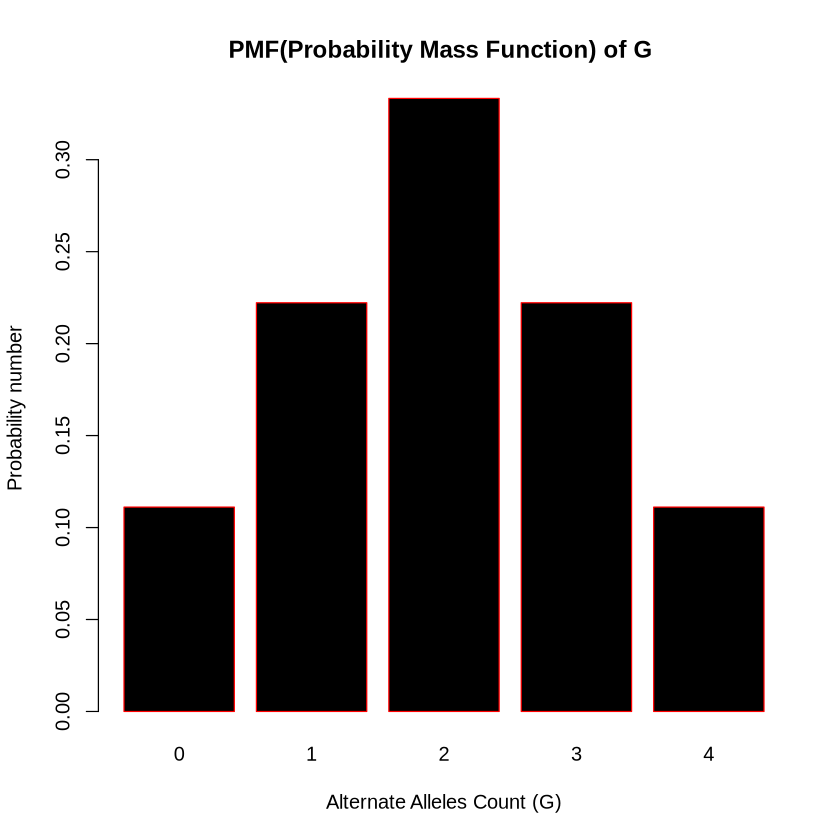

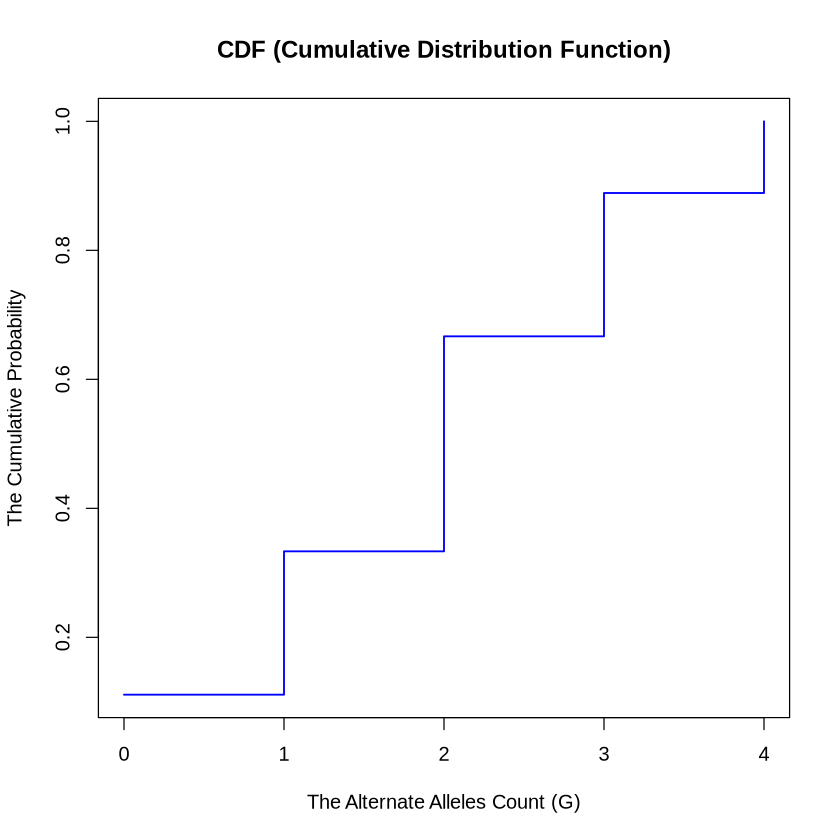

In [5]:

genotype <- c("00", "01", "11")
samplespace <- expand.grid(site1 = genotype, site2 = genotype)
alternate_alleles_fcount <- function(genotype) {length(grep("1", strsplit(genotype, "")[[1]]))}

# Calculate the count of '1's is calculated by applying this function to all the Genotype combinations
number_of_alleles <- apply(samplespace, 1, function(row) {sum(sapply(row, alternate_alleles_fcount))})

#  PMF of G 
probmf <- table(number_of_alleles) / nrow(samplespace)

# Plotting the PMF
barplot(probmf, names.arg = names(probmf), col = "black", border = "red", main = "PMF(Probability Mass Function) of G ", xlab = "Alternate Alleles Count (G)", ylab = "Probability number")

# Plot and calculate the CDF of G
cdf_values <- cumsum(probmf)
plot(names(cdf_values), cdf_values, type = "s", col = "blue", lwd = 1.5, main = "CDF (Cumulative Distribution Function)", xlab = "The Alternate Alleles Count (G)", ylab = "The Cumulative Probability")


__Problem 2__

__Task 2.1__

Assume that we observed some data of variable _G_ for several sequenced individuals. Specifically, the called genotypes for ten individuals over two sites are summarised in the following table: 

| individual | genotype at first site  | genotype at second site  | 
|---|---|---|
| __1__  | 00  | 01  |
| __2__  | 00  | 01  |
| __3__  | 11  | 00  |
| __4__  | 01  | 11  |
| __5__  | 11  | 01  |
| __6__  | 00  | 00  |
| __7__  | 01  | 01  |
| __8__  | 00  | 11  |
| __9__  | 11  | 00  |
| __10__  | 11  | 11  |


Produce an appropriate visualisation of the distribution of _G_ based on these individuals. Also, calculate one metric of central tendency, one metric of scale, and one metric of skewness for the distribution of _G_.

$mean_genotype
[1] 2

$sd_genotype
[1] 1.154701

$skewness_genotype
[1] 0

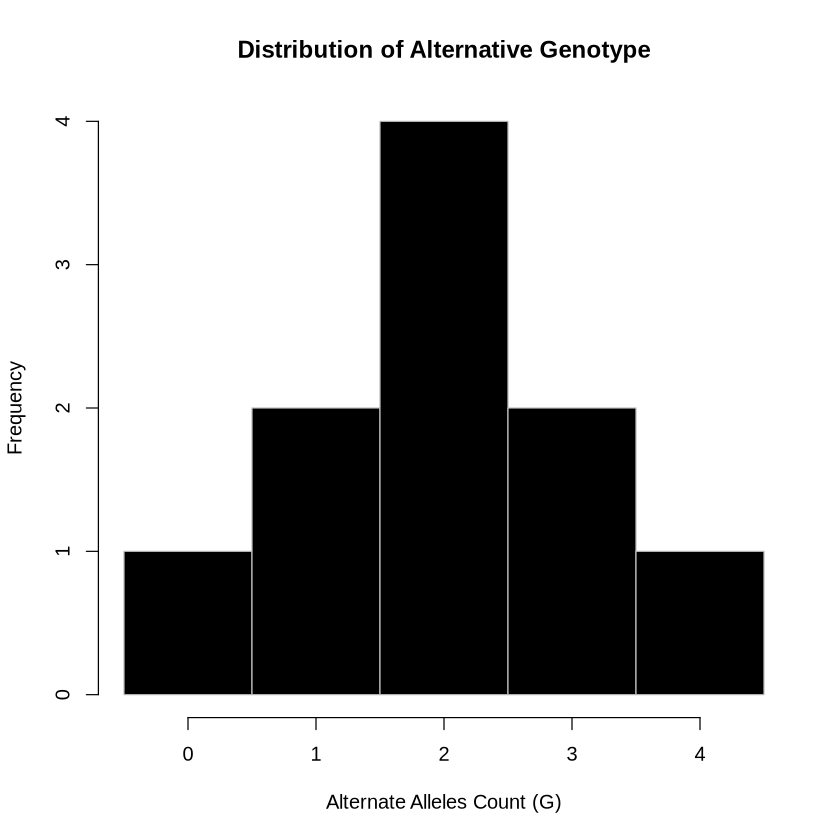

In [7]:
# Data frame is made from the data provided
G_alternatetypes <- data.frame(individual = 1:10,
  first_site = c("00", "00", "11", "01", "11", "00", "01", "00", "11", "11"),
  second_site = c("01", "01", "00", "11", "01", "00", "01", "11", "00", "11"))

# The genotype which is converted  strings to quantitative values
genotype_convert <- function(genotype) {sum(as.numeric(strsplit(genotype, "")[[1]]))}
G_alternatetypes$first_site_numeric <- sapply(G_alternatetypes$first_site, genotype_convert)
G_alternatetypes$second_site_numeric <- sapply(G_alternatetypes$second_site, genotype_convert)

# Calculating G itself
G_alternatetypes$G <- G_alternatetypes$first_site_numeric + G_alternatetypes$second_site_numeric

# Calculating the sd, mean and skewness
mean_genotype_alternative <- mean(G_alternatetypes$G)
sd_genotype_alternative <- sd(G_alternatetypes$G)

library(e1071) # This library is used for skewness
skewness_genotype_alternative <- skewness(G_alternatetypes$G)

# Metrics output
alternative_metrics <- list(mean_genotype = mean_genotype_alternative, sd_genotype = sd_genotype_alternative, skewness_genotype = skewness_genotype_alternative)

#  Show Distribution of G using a histogram 
hist(G_alternatetypes$G, breaks = seq(min(G_alternatetypes$G) - 0.5, max(G_alternatetypes$G) + 0.5, by = 1), 
     col = "black", border = "grey", main = "Distribution of Alternative Genotype", xlab = "Alternate Alleles Count (G)", ylab = "Frequency")

alternative_metrics


__Task 2.2__

Test whether the mean of _G_ is statistically significant different from the mean of the same random variable calculated on a different population _G2_.
_G2_ is defined as _G2 <- c(2, 4, 2, 3, 3, 3, 2, 3, 3, 4)_.
Define your hypotheses and write a report statement.

In [8]:
# Define the hypotheses
# The H0 is when the mean of G is seen to be equal to the mean of G2
# The H1 is when the mean of G is seen to not be equal to the mean of G2
#Previous question functions used (G_alternatetypes)

# A t-test for 2 sample
Genotype2_alternative <- c(2, 4, 2, 3, 3, 3, 2, 3, 3, 4)
alternative_t <- t.test(G_alternatetypes$G, Genotype2_alternative, var.equal = TRUE)

# The Report statement:
report_statement <- sprintf("The t-test for the means of both G_type and G2_type produces a t-statistic of %.4f. It als produces  a p-value of %.4f. Judging from the results, the null hypothesis that means are seen to be equivalent to  %s at the 5%% significance level.", alternative_t$statistic, 
 alternative_t$p.value,  if (alternative_t$p.value < 0.05) "is therefore rejected" else "can't be rejected")

report_statement


[1] "The t-test for the means of both G_type and G2_type produces a t-statistic of -2.0769. It als produces  a p-value of 0.0524. Judging from the results, the null hypothesis that means are seen to be equivalent to  can't be rejected at the 5% significance level."

__Problem 3__

Assume that you have the numerical variable `genotypes` of _G_ values, as previously defined, for 200 individuals. For each individual you have also access to further variables, such as `ancestry`, `income`, and `risk`. Variable `ancestry` is categorical coding for arbitrary groups of genetic ancestry. The variable `ancestry` should be treated as a factor variable. Variable `income` is continuous and represents the household income in pounds (in thousand units). Variable `risk` is continuous and indicates the susceptibility to a certain disease, in arbitrary units. These variables are accessible from the file `assignment.csv`.

Test whether `genotypes`, `ancestry` and `income` are statistically significant explanatory variables for the response variable `risk` using a general linear model. Choose the variables that fit the model the best by reducing the original model. Write a report statement and produce a plot of the final model (i.e. significant explanatory variables against the response variable).


Call:
lm(formula = risk ~ genotypes + ancestry + income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0811  -5.9671  -0.0471   6.1732  25.5084 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.82493    2.62742  -1.456  0.14706    
genotypes    4.99515    0.43495  11.484  < 2e-16 ***
ancestry     3.72153    1.13757   3.271  0.00126 ** 
income      -0.03711    0.08957  -0.414  0.67908    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.841 on 196 degrees of freedom
Multiple R-squared:  0.4233,	Adjusted R-squared:  0.4145 
F-statistic: 47.96 on 3 and 196 DF,  p-value: < 2.2e-16



Call:
lm(formula = risk ~ genotypes + ancestry, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0427  -6.0425  -0.0805   6.2501  25.5660 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.5541     1.9469  -2.339   0.0203 *  
genotypes     5.0041     0.4335  11.543  < 2e-16 ***
ancestry      3.3746     0.7684   4.392 1.83e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.822 on 197 degrees of freedom
Multiple R-squared:  0.4228,	Adjusted R-squared:  0.417 
F-statistic: 72.16 on 2 and 197 DF,  p-value: < 2.2e-16


This plot shows the relationship between the Genotypes and Ancestry against the response variable, which is the Risk. The red points show the Genotypes, with a red regression line, while the blue points represent the Ancestry, with a blue regression line. The legend  also labels the two variables.

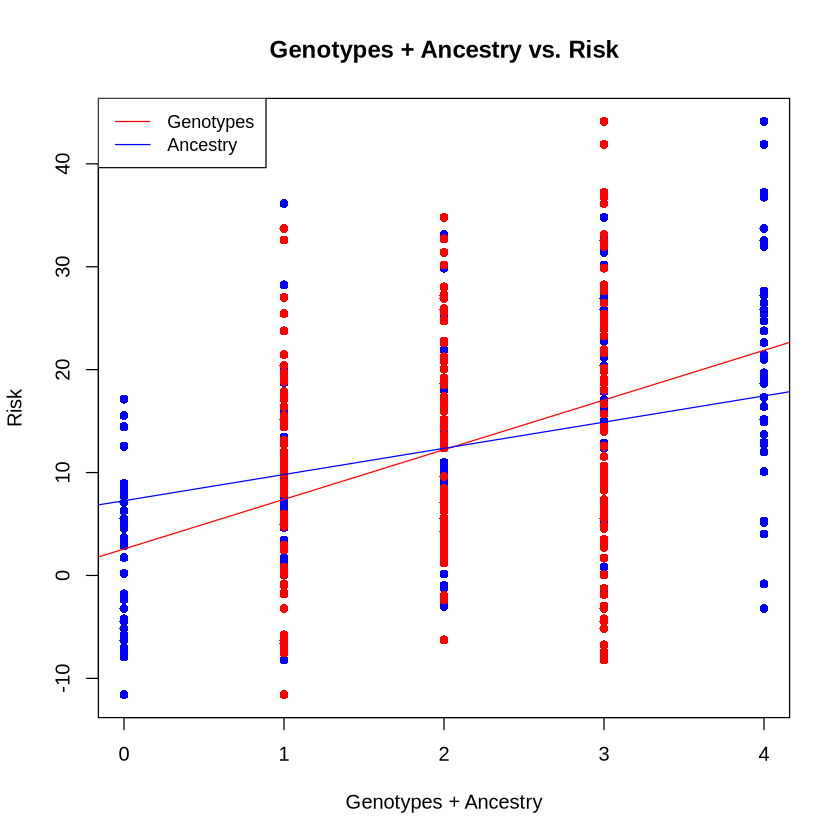

In [3]:
# import the data
data <- read.csv("assignment.csv")

# The linear models are fitted on and the summaries are shown.
start_model <- lm(risk ~ genotypes + ancestry + income, data = data)
final_model <- lm(risk ~ genotypes + ancestry, data = data)

summary(start_model)
summary(final_model)

# Set up a 1x1 grid. This allows us to do a single plot
par(mfrow = c(1, 1))

# The graph produced will consist of plotting risk against the Genotypes and Ancestry
plot(data$genotypes, data$risk, xlab = "Genotypes + Ancestry", ylab = "Risk", 
     main = "Genotypes + Ancestry vs. Risk", col = "blue", pch = 16)

# The points for ancestry are added
points(data$ancestry, data$risk, col = "red", pch = 16)

# The regression lines are also added
abline(lm(risk ~ genotypes, data = data), col = "red")
abline(lm(risk ~ ancestry, data = data), col = "blue")

# This is the legend for the topleft hand corner.
legend("topleft", legend = c("Genotypes", "Ancestry"), col = c("red", "blue"), 
       lty = 1, cex = 0.9)

# This the description summary of the graph
cat("This plot shows the relationship between the Genotypes and Ancestry against the response variable, which is the Risk. The red points show the Genotypes, with a red regression line, while the blue points represent the Ancestry, with a blue regression line. The legend in the topleft hand corner also labels the two variables.")


__Problem 4__

Assume that the variable `income` is distributed as a mixture of Normal distributions. Specifically, its probability density function is modelled as $\alpha \mathcal{N}(\mu_1, (\mu_1/10)^2) + (1-\alpha) \mathcal{N}(\mu_2, (\mu_2/10)^2)$ with parameters $\alpha$, $\mu_1$, and $\mu_2$. In this mixture distribution, two Normal distributions with different means and variances are weighted by $\alpha$ and $1-\alpha$, respectively.

Calculate point estimates and confidence intervals (or other metrics of uncertainty) for each parameter. Choose a suitable statistical approach among the ones discussed in class.

In [2]:
# Loading the required packages and then load the data
install.packages("boot")
library(boot)
data <- read.csv("assignment.csv")

# log-likelihood function to calculate the GMM
#dnorm calculates likelihood of individual components
#total likelihood sums up all these components
#1e-10 is used to avoid the log of 0
likelihood_log <- function(parameters, data) {alpha <- parameters[1]mu1 <- parameters[2]sigma1 <- parameters[3]mu2 <- parameters[4]sigma2 <- parameters[5]
if (sigma1 <= 0 || sigma2 <= 0 || alpha <= 0 || alpha >= 1) return(Inf)
  
component_1 <- alpha * dnorm(data, mu1, sigma1)
component_2 <- (1 - alpha) * dnorm(data, mu2, sigma2)
likelihood_total <- component_1 + component_2
likelihood_total[likelihood_total == 0] <- 1e-10
-sum(log(likelihood_total))}

# These are guesses for the initial parameter, used for starting points for the algorithm
initial_parameter <- c(0.5, mean(data$income) - sd(data$income), sd(data$income), mean(data$income) + sd(data$income), sd(data$income))

# This is for the Maximum Likelihood Estimation. It uses the optim function. This finds the values that maximise the likelihood_log.
MLE_fittingresult <- optim(initial_parameter, likelihood_log, data = data$income,  method = "L-BFGS-B", lower = c(0.01, -Inf, 0.01, -Inf, 0.01), 
                    upper = c(0.99, Inf, Inf, Inf, Inf), control = list(maxit = 10000))
parameter_MLE <- MLE_fittingresult$par

# Bootstrap function used to resample data and apply the MLE fitting. The 'tryCatch' handles any errors within the optimization process.
bootstrap_function <- function(data, indices) {data_resampling <- data[indices]
resample_MLE <- tryCatch(optim(initial_parameter, likelihood_log, data = data_resampling,  method = "L-BFGS-B", lower = c(0.01, -Inf, 0.01, -Inf, 0.01),  upper = c(0.99, Inf, Inf, Inf, Inf), control = list(maxit = 10000)), 
error = function(e) rep(NA, length(initial_parameter)))
  if (!is.null(resample_MLE)) resample_MLE$par else rep(NA, length(initial_parameter))}

# The set.seed(123) is used to the reproducibility of the sampling of the bootstrap method. R is equal to 1000 to allow us to estimate the variability of the parameters of MLE.
set.seed(123)
bootstrap_res <- boot(data$income, bootstrap_function, R = 1000)
confidenceinterval_parameters <- apply(bootstrap_res$t, 2, function(x) quantile(x, c(0.025, 0.975), na.rm = TRUE))

# results
names_of_parameter <- c("Alpha", "Mu1", "Sigma1", "Mu2", "Sigma2")
cat("The Point Estimates and The 95% Confidence Intervals\n")
cat("--------------------------------------------\n")
for (i in 1:length(parameter_MLE)) {
  cat(sprintf("%s\n", names_of_parameter[i]))
  cat(sprintf("  The Point Estimate: %.4f\n", parameter_MLE[i]))
  cat(sprintf("  The 95%% Confidence Interval: [%.4f, %.4f]\n\n", confidenceinterval_parameters[1, i], confidenceinterval_parameters[2, i]))
}


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



The Point Estimates and The 95% Confidence Intervals
--------------------------------------------
Alpha
  The Point Estimate: 0.6058
  The 95% Confidence Interval: [0.5348, 0.6759]

Mu1
  The Point Estimate: 30.1521
  The 95% Confidence Interval: [29.5349, 30.7466]

Sigma1
  The Point Estimate: 3.1303
  The 95% Confidence Interval: [2.7290, 3.4968]

Mu2
  The Point Estimate: 49.8100
  The 95% Confidence Interval: [48.6081, 50.9197]

Sigma2
  The Point Estimate: 4.8348
  The 95% Confidence Interval: [3.9428, 5.7290]

